## Seasonal Statistics

Let's now compute seasonal statistics with box plots. Let's first begin by loading the data and sorting it by month.

In [1]:
import xarray as xarr

# load data
data = xarr.open_dataset("./data/clipped_daily_pressure_1988.nc")
data["t_celsius"] = data['t'] - 273.15

# Get data for each season directly
winter = data['t_celsius'].where(data['valid_time'].dt.month.isin([12,1,2]), drop=True)
spring = data['t_celsius'].where(data['valid_time'].dt.month.isin([3,4,5]), drop=True)
summer = data['t_celsius'].where(data['valid_time'].dt.month.isin([6,7,8]), drop=True)
fall = data['t_celsius'].where(data['valid_time'].dt.month.isin([9,10,11]), drop=True)




Now, to fix [the error](https://matplotlib.org/stable/gallery/lines_bars_and_markers/masked_demo.html) about the data having fewer than two dimensions, we need to remove the NaN values.

In [2]:
winter_vals = winter.values[~(winter.isnull().values)]
spring_vals = spring.values[~(spring.isnull().values)]
summer_vals = summer.values[~(summer.isnull().values)]
fall_vals = fall.values[~(fall.isnull().values)]

We can now generate and save the plot as follows.

C:\Users\hudso\AppData\Local\Temp\ipykernel_11908\3907159685.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plot.boxplot([winter_vals, spring_vals, summer_vals, fall_vals], labels=["Winter", "Spring", "Summer", "Fall"])


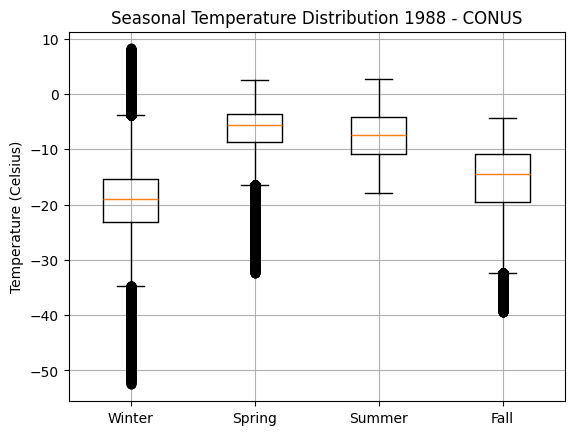

In [4]:
import matplotlib.pyplot as plot

box_plot = plot.boxplot([winter_vals, spring_vals, summer_vals, fall_vals], labels=["Winter", "Spring", "Summer", "Fall"])
plot.ylabel("Temperature (Celsius)")
plot.title("Seasonal Temperature Distribution 1988 - CONUS")
plot.grid(True)
plot.savefig("./plots/Seasonal_Statistics_Daily_Pressure_1988.png")
plot.show()